# Linear Regression
In the file ``Propeller_identification.ipynb`` we tested the motor and collected the data points, which are stored in ``.csv`` files.

Now we use the dataset to determine the coefficients of the transfer function of the motor.

## PWM to Thrust transfer function
We assume the function to be linear

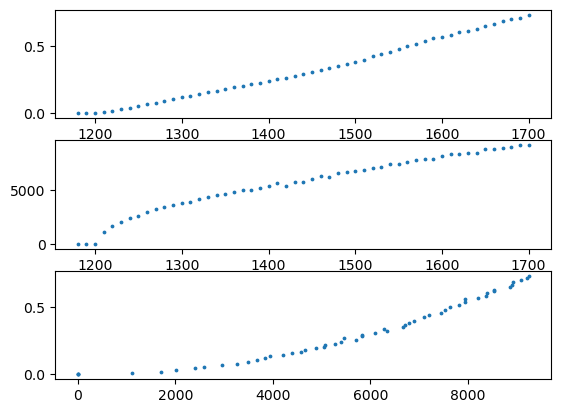

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data
filename = 'Dataset_ramp copy.csv'
data = pd.read_csv(filename, sep=',')
data.describe()

# Split the columns
pwm = data['PWM'].to_numpy().reshape(-1,1)
rpm = data['RPM'].to_numpy().reshape(-1,1)
thrust = data['Thrust'].to_numpy().reshape(-1,1)
#print(pwm.head())
#print(rpm.head())
#print(thrust.head())

fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.scatter(pwm, thrust, s=3)
ax2.scatter(pwm, rpm, s=3)
ax3.scatter(rpm, thrust, s=3)

[[0.0014554]]
predicted_thrust: (53, 1)


Text(0, 0.5, 'Thrust')

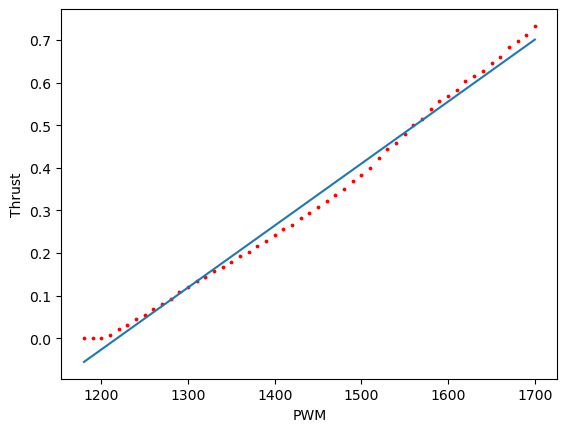

In [27]:
# Define the linear regression model
from sklearn import linear_model
linreg = linear_model.LinearRegression()

# Train the model on the dataset
linreg.fit(pwm, thrust)
w = linreg.coef_.reshape(-1,1)
print(w)

# Predict the values
predicted_thrust = linreg.predict(pwm)
print(f"predicted_thrust: {predicted_thrust.shape}")

# Plot
fig, axes = plt.subplots()
axes.scatter(pwm, thrust, s=3, color='red')
axes.plot(pwm, predicted_thrust)
plt.xlabel('PWM')
plt.ylabel('Thrust')

[[-2.68974621e-06]
 [ 8.76232865e-09]]
predicted_thrust: (53, 1)


Text(0, 0.5, 'Thrust')

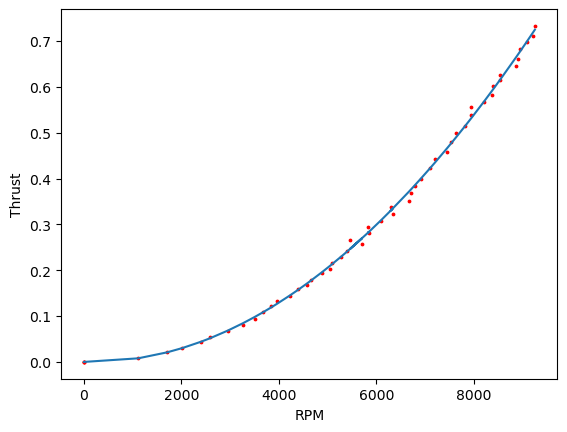

In [28]:
# Define the basic function for the rpm to thrust function
phi = np.power(rpm, [1,2])
#print(phi)
assert phi.shape == (rpm.shape[0], 2)

# Train the model on the dataset
linreg.fit(phi, thrust)
w = linreg.coef_.reshape(-1,1)
print(w)

# Predict the values
predicted_thrust = linreg.predict(phi)
print(f"predicted_thrust: {predicted_thrust.shape}")

# Plot
fig, axes = plt.subplots()
axes.scatter(rpm, thrust, s=3, color='red')
axes.plot(rpm, predicted_thrust)
plt.xlabel('RPM')
plt.ylabel('Thrust')

[[-100.57482411]
 [8848.44669068]]
predicted_rpm: (53, 1)


Text(0, 0.5, 'RPM')

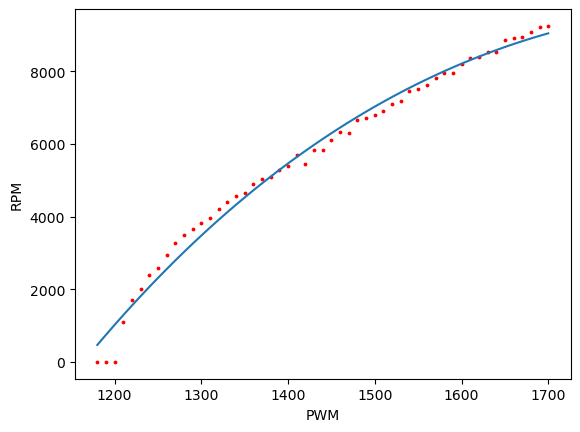

In [35]:
# Define the basic function for the rpm to thrust function
phi = np.power(pwm, [1, 0.5])
#print(phi)
assert phi.shape == (pwm.shape[0], 2)

# Train the model on the dataset
linreg.fit(phi, rpm)
w = linreg.coef_.reshape(-1,1)
print(w)

# Predict the values
predicted_rpm = linreg.predict(phi)
print(f"predicted_rpm: {predicted_thrust.shape}")

# Plot
fig, axes = plt.subplots()
axes.scatter(pwm, rpm, s=3, color='red')
axes.plot(pwm, predicted_rpm)
plt.xlabel('PWM')
plt.ylabel('RPM')